# 1. Khai báo thư viện

In [17]:
# Khái báo thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("Khai báo thư viện thành công")

Khai báo thư viện thành công


# 2. Tiền xử lý dữ liệu

## 2.1. Nhập dữ liệu

In [18]:
data = pd.read_csv('GDPlist.csv', header=0, encoding = "ISO-8859-1")
print('*'*20, "Nhập dữ liệu thành công", '*'*20)
print(data)

******************** Nhập dữ liệu thành công ********************
          Country      Continent  GDP (millions of US$)
0     Afghanistan           Asia                  18181
1         Albania         Europe                  12847
2         Algeria         Africa                 190709
3          Angola         Africa                 100948
4       Argentina  South America                 447644
..            ...            ...                    ...
120    Uzbekistan           Asia                  45353
121     Venezuela  South America                 315841
122       Vietnam           Asia                 122722
123         Yemen         Africa                  33675
124        Zambia         Africa                  19206

[125 rows x 3 columns]


## 2.2 Khảo sát dữ liệu

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


# 3. Phân tích dữ liệu (giải đáp bài toán)

## 3.1. Bộ dữ liệu chứa bao nhiêu dòng, bao nhiêu cột

In [20]:
print("Thông tin về kích thước của DataFrame")
print(data.shape)
print("Số dòng là: ", data.shape[0], " và số cột là: ", data.shape[1])

Thông tin về kích thước của DataFrame
(125, 3)
Số dòng là:  125  và số cột là:  3


## 3.2. Thang đo tương ứng của các thuộc tính được lưu trữ

In [21]:
# Nhìn lại dữ liệu một lần nữa
print(data, "\n")
data.info()

          Country      Continent  GDP (millions of US$)
0     Afghanistan           Asia                  18181
1         Albania         Europe                  12847
2         Algeria         Africa                 190709
3          Angola         Africa                 100948
4       Argentina  South America                 447644
..            ...            ...                    ...
120    Uzbekistan           Asia                  45353
121     Venezuela  South America                 315841
122       Vietnam           Asia                 122722
123         Yemen         Africa                  33675
124        Zambia         Africa                  19206

[125 rows x 3 columns] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    o

In [22]:
print('*'*20, 'Nhận xét', '*'*20);
print('Thuộc tính của ', data.columns[0], ' là định danh nominal');
print('Thuộc tính của ', data.columns[1], ' là định danh nominal');
print('Thuộc tính của ', data.columns[2], ' là định lượng ratio');

******************** Nhận xét ********************
Thuộc tính của  Country  là định danh nominal
Thuộc tính của  Continent  là định danh nominal
Thuộc tính của  GDP (millions of US$)  là định lượng ratio


## 3.2. GDP của các quốc gia có đồng đều không

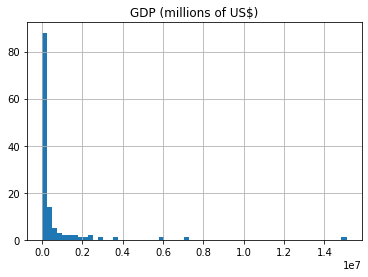

In [23]:
# Vẽ biểu đồ Histogram thể hiện GDP vs các nước
data.hist(column='GDP (millions of US$)', bins=60)
plt.show()

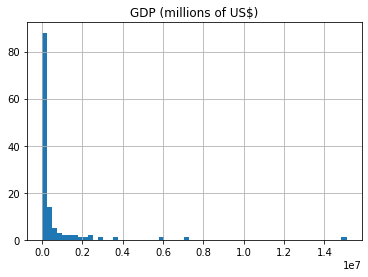

In [24]:
# Cách 2: dùng matplotlib
plt.hist(data['GDP (millions of US$)'], bins=60)
plt.grid(True)
plt.title('GDP (millions of US$)')
plt.show()

In [25]:
# KẾT LUẬN
print('GDP không đồng đều. Đa số các nước đều có GDP thấp, mốt số nước thì có GDP cao bật hẳn lên')

GDP không đồng đều. Đa số các nước đều có GDP thấp, mốt số nước thì có GDP cao bật hẳn lên


## 3.3. Mỗi châu lục có bao nhiêu quốc gia nằm trong bảng dữ liệu

In [26]:
print('Trong thống kê có các châu lục là: ', end=' ')
print(*data['Continent'].unique(), sep = ", ")
print('Số lượng châu lục là: ', data['Continent'].unique().size)

Trong thống kê có các châu lục là:  Asia, Europe, Africa, South America, Oceania, North America
Số lượng châu lục là:  6


In [27]:
soluong = data.groupby('Continent')['Country'].count() #.size()
print(soluong)

Continent
Africa           29
Asia             36
Europe           37
North America    11
Oceania           3
South America     9
Name: Country, dtype: int64


In [28]:
print('Số lượng các quốc gia trong: ', end = ' ')
print(*data['Continent'].unique(), sep = ", ", end = ' ')
print('lần lượt là: ', end=' ')
print(*soluong, sep = ", ", end = '.')

Số lượng các quốc gia trong:  Asia, Europe, Africa, South America, Oceania, North America lần lượt là:  29, 36, 37, 11, 3, 9.

## 3.4. Tổng GPD của các châu lục

In [29]:
gdp = data.groupby('Continent')['GDP (millions of US$)'].sum()
print(gdp)

Continent
Africa            1820811
Asia             24425891
Europe           19139380
North America    18238447
Oceania           1662727
South America     4141217
Name: GDP (millions of US$), dtype: int64


In [30]:
print('Tổng GDP của các châu lục: ', end = ' ')
print(*data['Continent'].unique(), sep = ", ", end = ' ')
print('lần lượt là: ', end=' ')
print(*gdp, sep = ", ", end = ' millions of US$.')

Tổng GDP của các châu lục:  Asia, Europe, Africa, South America, Oceania, North America lần lượt là:  1820811, 24425891, 19139380, 18238447, 1662727, 4141217 millions of US$.

## 3.5. Top 10 quốc gia có GDP cao nhất

In [31]:
top = data.groupby('Country')['GDP (millions of US$)'].sum().sort_values(ascending= False)
top10 = top.head(10)
top10

Country
 United States     15094025
 China              7298147
 Japan              5869471
 Germany            3577031
 France             2776324
 Brazil             2492908
 United Kingdom     2417570
 Italy              2198730
 Russia             1850401
 Canada             1736869
Name: GDP (millions of US$), dtype: int64

In [32]:
print('Top 10 quốc gia có GDP cao nhất là: ', end = ' ')
print(*top10.index, sep = ", ", end = ' ')
print('với giá trị lần lượt là: ', end=' ')
print(*top10, sep = ", ", end = ' millions of US$.')

Top 10 quốc gia có GDP cao nhất là:   United States,  China,  Japan,  Germany,  France,  Brazil,  United Kingdom,  Italy,  Russia,  Canada với giá trị lần lượt là:  15094025, 7298147, 5869471, 3577031, 2776324, 2492908, 2417570, 2198730, 1850401, 1736869 millions of US$.